<a href="https://colab.research.google.com/github/jpmedsoares/data_science/blob/master/Analisando_os_Dados_do_Airbnb(Porto_Portugal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Curso Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*
#### *Example made by [Joao Soares](https://www.linkedin.com/in/o-joao-soares/)*
---

# Análise dos Dados do Airbnb - *Porto*

A [Airbnb](https://www.airbnb.com.br/) atualmente é considerada a **maior empresa hoteleira da atualidade**mesmo **não possuindo nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa viável e descomplicada.

No final de 2018 já havia **hospedado mais de 300 milhões** de pessoas ao redor do globo, colocando a industria hoteleiras em cheque.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="50%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Porto, no norte de Portugal, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Como dito anteriormente, os dado aqui utilizados são públicos, e forma obtidos no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

Para nossa análise inicial, utilizaremos apenas o seguinte arquivo:

* `[listings.csv]` - *Summary information and metrics for listings in Porto (good for visualisations).*

In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/norte/porto/2020-04-23/visualisations/listings.csv")

## Análise dos Dados

Neste ponto é importante criar uma referência rápida que nos ajude a entender melhor os dados e o que eles significam. Este passo também é importante para começarmos a formular as **perguntas que queremos responder**.

Para isso olharemos as primeiras entrada do nosso Data Set e criaremos um Dicinário de Dados:


In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,58,5,17,2018-09-28,0.20,1,164
1,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-09-07,0.24,3,0
2,70925,APARTMENT WITH THE BEST CITY VIEW,361205,Miguel,VILA NOVA DE GAIA,Santa Marinha e São Pedro da Afurada,41.13810,-8.61108,Entire home/apt,97,4,57,2019-12-09,0.54,2,308
3,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.13,3,0
4,76436,Go2oporto @ River Side,399503,Go2oporto,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.13925,-8.61477,Entire home/apt,91,2,183,2020-03-12,1.78,20,303


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

A seguir iremos verificar a quantidade de Entradas (linhas do csv) e qual o tipo de dado cada coluna representa.

Note que o dataset utilizado é a versão resumida `listings.csv`, poderíamos também optar pela versão mais completa disponibilizada pelo site, `listings.csv.gz`, mas para fins didáticos a versão resumida nos atende perfeitamente.

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11904
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Para iniciar a nossa análise, é importante avaliar a qualidade do dataset.
Fazemos isso verificando a quantidade de valores ausentes e analisando sua importância contra o total de entradas do dataset escolhido.



In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.158938
last_review                       0.158938
host_name                         0.000084
name                              0.000084
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Desta primeira análise podemos observar que:

* É possível ver que as colunas reviews_per_month e last_review possuem valores nulos em aproximadamente 16% das entradas.




### **Q3. Qual o tipo de distribuição das variáveis?** 

Para facilitar a observação da distribuição das variáveis, plotaremos um Histograma abaixo:

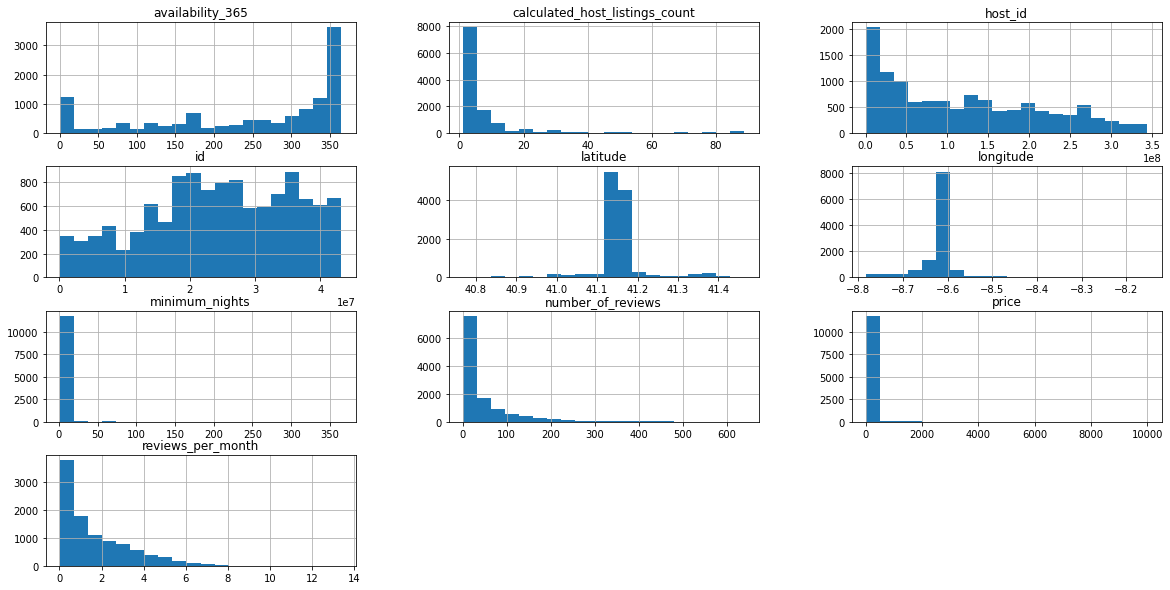

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(20,10));

### **Q4. Há *outliers* presentes?**

*Outliers* são dados que se afastam demais da distribuição normal, e podem distorcer a representação gráfica dos dados, por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Para identificar possíveis *outliers* podemos utilizar duas maneiras rápidas:
* Resumo estatistico através do método `describe()`
* Plotando `boxplots` das variáveis suspeitas.


In [9]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11904.000000,11904.000000,11904.000000,10012.000000,11904.000000,11904.000000
mean,85.259913,2.623992,43.264029,1.686250,8.399698,246.258485
std,227.285050,8.927673,68.369793,1.659522,15.152223,123.906763
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,43.000000,1.000000,2.000000,0.360000,1.000000,161.000000
50%,60.000000,2.000000,15.000000,1.090000,3.000000,300.000000
75%,89.000000,2.000000,55.000000,2.610000,7.000000,354.000000
max,10000.000000,365.000000,640.000000,13.390000,89.000000,365.000000


Pelo resultado do resumko estatístico acima, podemos levantas algumas hipóteses, tais como:

* A variável preço (`price`) possui 75% do valor abaixo de `89,00`, porém seu valor máximo é `10000,00`.
* A quantidade mínima de noites (`minimum_nights`) possui 75% do valor abaixo de `2`, porém seu valor máximo é de `365`.

#### Criando um Boxplot para minimum_nights:

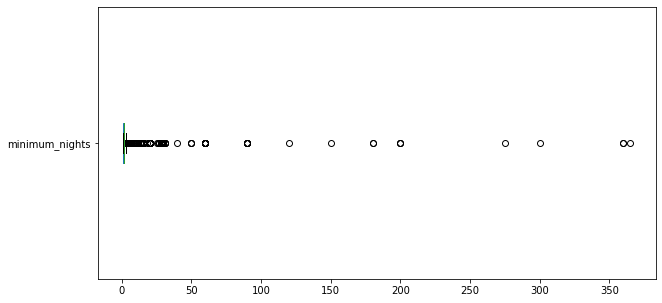

In [10]:
#minimum_nights
df.minimum_nights.plot(kind='box', figsize=(10, 5), vert=False)
plt.show()

Podemos observar alguma dispersão no número mínimo de noites acima de 30, vejamos as quantidades:

In [11]:
# ver a quantidade de valores acima de 30 dias para a variável minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas encontradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

minimum_nights: valores acima de 30:
37 entradas encontradas
0.3108%


Desta análise podemos concluir que:

* Cerca de **0.31%** da nossa amostra possui a variável `minimum_nights` acima de 30 dias



####Aplicando as mesmas ferramentas para a variável preço:

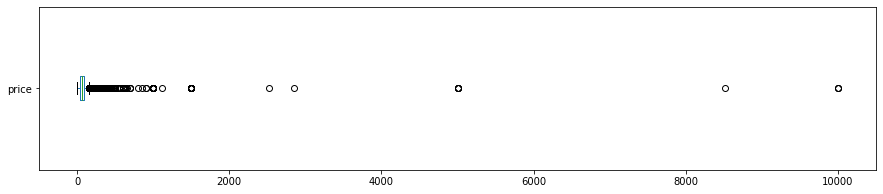

In [12]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

Podemos observar alguma dispersão no preço acima de 300, vejamos as quantidades:

In [13]:
# ver quantidade de valores acima de 300 para price
print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))


price: valores acima de 500
84 entradas
0.7056%


Desta análise podemos concluir que:

* Cerca de **0.7%** da nossa amostra possui a variável `price` acima de 500 euros


#####Histogramas sem *outliers*

Identificados *outliers* nas variáveis `price` e `minimum_nights`, iremos agora limpar o *DataFrame* destas e plotar novamente o histograma.

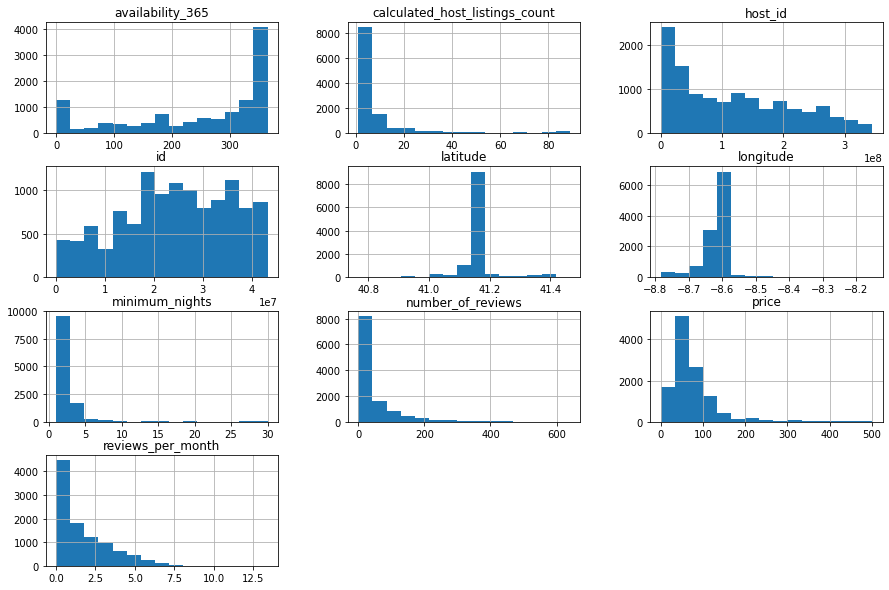

In [14]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

Mesmo limitando os valores de preço para os menores do que 500, ainda temos alguma distorção.
Vejamos qual o valor médio para a variável preço quando tomamos todo o nosso *dataset*:

In [15]:
# ver a média da coluna `price``
(df.price.sum() / df.shape[0])
print("{:.2f} Euros".format((df.price.sum() / df.shape[0])))

85.26 Euros


### **Q6. Qual a correlação existente entre as variáveis**

No nosso contexto, correlação significa que existe uma relação ou semelhança entre duas ou mais variáveis. 

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, iremos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [16]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.034108,-0.125056,-0.123227,-0.007965,0.118357
minimum_nights,-0.034108,1.000000,-0.061309,-0.098310,-0.053065,-0.072915
number_of_reviews,-0.125056,-0.061309,1.000000,0.763947,-0.078626,0.056477
reviews_per_month,-0.123227,-0.098310,0.763947,1.000000,-0.073651,0.073574
calculated_host_listings_count,-0.007965,-0.053065,-0.078626,-0.073651,1.000000,0.098775
availability_365,0.118357,-0.072915,0.056477,0.073574,0.098775,1.000000


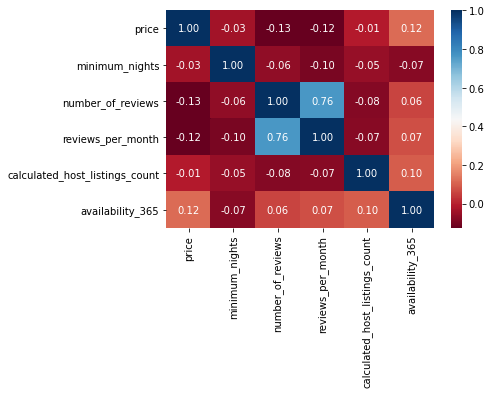

In [17]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, fmt='.2f', square=False, linecolor='green', annot=True, cmap='RdBu');

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Para verificar qual deles é mais locado, iremos  contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [18]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9150
Private room       2225
Hotel room          252
Shared room         158
Name: room_type, dtype: int64

In [23]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]



Entire home/apt    0.776411
Private room       0.188799
Hotel room         0.021383
Shared room        0.013407
Name: room_type, dtype: float64

Desta análise podemos concluir que:

* A maior parte da nossa amostra, cerca de **77,64%**, é composta de alugueis de casas ou apartamentos inteiros
* Em segundo lugar temos os alugéis de quartos privativos, com cerca de **18,88%**


### **Q8. Qual a localidade mais cara do dataset?**

Para verificar uma variável em função da outra utilizamos a função `groupby()`. Neste exemplo, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [28]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Negrelos (São Tomé)                  400.000000
Folgosa                              255.000000
Recarei                              250.000000
Água Longa                           200.000000
Covelas                              200.000000
São Miguel do Mato                   200.000000
Santa Eulália                        197.500000
São Paio de Oleiros                  190.000000
Tropeço                              190.000000
Junqueira                            184.750000
Fermedo                              184.285714
Alvarenga                            179.375000
Areias, Sequeiró, Lama e Palmeira    178.000000
Melres e Medas                       177.642857
Lomba                                161.555556
Name: price, dtype: float64

Os resultados acima nos levama  crer que bairros como `Negrelos`, `Folgosa` e `Recarei` tem os preços de aluguel mais caros.

Sabemos também que a média dos preços de aluguel é de cerca de 85 euros, portanto os primeiros bairros de nossa lista estão bastante acima da média, o que pode significar algum tipo de distorção.

Vejamos quantos imóveis temos disponíveis em cada um destes bairros:

In [31]:
# ver quantidade de imóveis no Negrelos (São Tomé)
print(df_clean[df_clean.neighbourhood == "Negrelos (São Tomé)"].shape)

# ver a entradas do bairro Negrelos (São Tomé)
df_clean[df_clean.neighbourhood == "Negrelos (São Tomé)"]

(1, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7335,28651817,"Casa fantástica com história, charme e privaci...",24480387,Clara,SANTO TIRSO,Negrelos (São Tomé),41.34715,-8.40981,Entire home/apt,400,3,1,2019-08-27,0.12,1,305


In [32]:
# ver quantidade de imóveis no Folgosa
print(df_clean[df_clean.neighbourhood == "Folgosa"].shape)

# ver a entradas do bairro Folgosa
df_clean[df_clean.neighbourhood == "Folgosa"]

(1, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1474,8984460,Casa com jardins e piscina,3569607,Paraiso,MAIA,Folgosa,41.26576,-8.5491,Entire home/apt,255,3,28,2019-10-27,0.54,1,275


In [33]:
# ver quantidade de imóveis no Recarei
print(df_clean[df_clean.neighbourhood == "Recarei"].shape)

# ver a entradas do bairro Recarei
df_clean[df_clean.neighbourhood == "Recarei"]

(1, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1179,7234445,Moradia de Luxo c/ Piscina e Wi-FI,37877962,Miguel,PAREDES,Recarei,41.14971,-8.44221,Entire home/apt,250,7,0,NaN,NaN,1,267


Podemos observar que cada um destes bairros possui apenas um imóvel, sendo `Negrelos` e `Recarei` tem pouquissimos ou nenhum review.

Talvez numa análise mais detalhada pudéssemos limpar novamente a nossa amostra para remover tais distorções.


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`, e abaixo veremos como os imoveis estão distruibuidos ao longo do mapa da cidade:

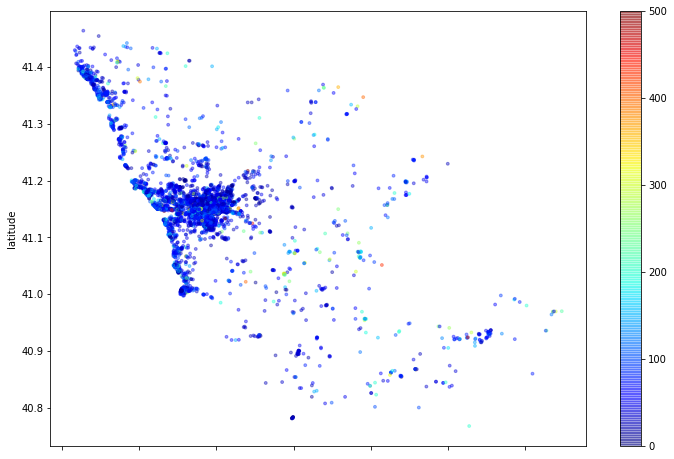

In [35]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Durante nossa análise vimos que alguns imóveis estão disponíveis para aluguel com quantidades minimas de noites muito variadas.

Vamos avaliar a media do *dataset* para ter uma idéia melhor de quais entradas poderiam estar distorcendo esta variável:


In [42]:
# ver a média da coluna `minimum_nights``
noites = df_clean.minimum_nights.sum() / df_clean.shape[0]
print("{:.2f} Noites".format(noites))


2.27 Noites



Numa análise mais aprofundada poderíamos remover do nosso *dataset* os valores que se afastem demais da média de `2,27` noites.

## Conclusões


Nesta primeira e superficial análise pudemos constatar:

* Existem *outliers* em algumas variáveis como `price` e `minimum_nights`
* Algumas localidades possuem poucos imóveis, de pouca relevancia se observada a variável `number_of_reviews`

Por fim, lembramos que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. 
Em uma próxima análise exploratória recomenda-se que seja utilizado o conjunto de dados completos, com 106 atributos disponíveis.
